In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [24]:
# Cargar el DataFrame generado previamente
# Asegúrate de que el DataFrame tenga columnas ['x', 'y', 'z'] y ['interpolated_valor1', ..., 'interpolated_valor200']
df = pd.read_csv('interpolated_results.csv')

In [25]:
# Separar las características (X) y las etiquetas (y)
X = df[['x', 'y', 'z']].values  # Coordenadas (entradas)
y = df.iloc[:, 3:].values       # Energías (salidas)

In [26]:
# Dividir los datos en entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Escalar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import Ridge  # Cambia esto a Lasso si prefieres Lasso

In [29]:
# Entrenar el modelo de regresión con regularización Ridge (puedes cambiarlo a Lasso si prefieres)
model = Ridge(alpha=1.0)  # 'alpha' controla la regularización
model.fit(X_train_scaled, y_train)

Ridge()

In [30]:
# Realizar predicciones
y_pred = model.predict(X_test_scaled)

In [31]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Modelo de regresión lineal con Ridge:")
print(f" - MSE: {mse:.4f}")
print(f" - R²: {r2:.4f}")
print("-------------------------------")

Modelo de regresión lineal con Ridge:
 - MSE: 0.0002
 - R²: 0.7406
-------------------------------


In [32]:
# Si deseas guardar el modelo entrenado
import pickle
with open('modelo_regresion_lineal.pkl', 'wb') as f:
    pickle.dump(model, f)

In [33]:
# También puedes guardar las predicciones
predictions_df = pd.DataFrame(y_pred, columns=[f'pred_valor{i+1}' for i in range(y_pred.shape[1])])
predictions_df.to_csv('predicciones.csv', index=False)


In [43]:
import numpy as np

# Definir los límites del cubo con los valores mínimo y máximo de las coordenadas x, y, z
x_min, x_max = df['x'].min(), df['x'].max()
y_min, y_max = df['y'].min(), df['y'].max()
z_min, z_max = df['z'].min(), df['z'].max()

# Generar coordenadas aleatorias dentro de los límites del cubo
num_samples = 5000  # Número de coordenadas aleatorias que quieres generar
random_coordinates = np.array([
    [np.random.uniform(x_min, x_max), 
     np.random.uniform(y_min, y_max), 
     np.random.uniform(z_min, z_max)]
    for _ in range(num_samples)
])

In [44]:
print(random_coordinates)

[[ 0.75023985  0.67760517 -0.29769361]
 [ 0.93202213  0.32786465  0.06235593]
 [ 0.39935572  0.36027419  0.70332716]
 ...
 [ 0.8736743   0.45326023  0.27787132]
 [-0.23985875 -0.1622095  -0.43681553]
 [-0.06957563  0.51025331 -0.50344715]]


In [45]:
# Predicción de la energía para las coordenadas aleatorias
predicted_energies = model.predict(random_coordinates)

print(predicted_energies)

[[0.         0.         0.         ... 0.00029994 0.00029063 0.00028161]
 [0.         0.         0.         ... 0.0003007  0.00029137 0.00028232]
 [0.         0.         0.         ... 0.00030122 0.00029187 0.00028281]
 ...
 [0.         0.         0.         ... 0.0003018  0.00029243 0.00028336]
 [0.         0.         0.         ... 0.00029219 0.00028312 0.00027433]
 [0.         0.         0.         ... 0.00029523 0.00028607 0.00027719]]


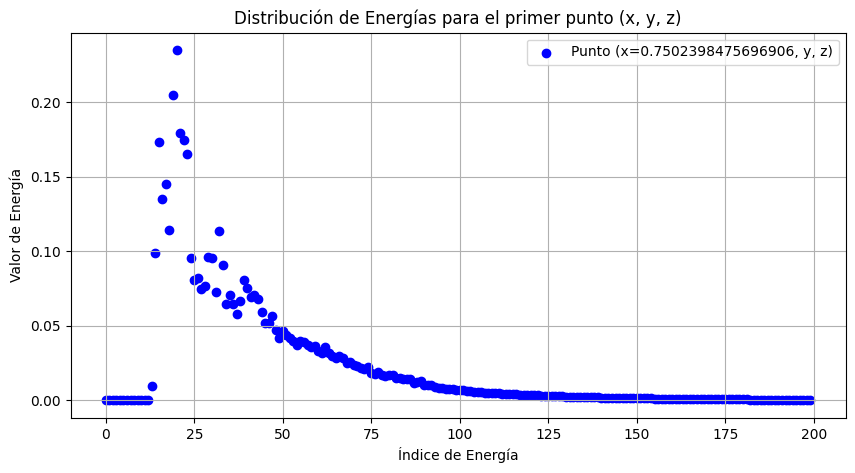

In [48]:
import numpy as np
import matplotlib.pyplot as plt



# Simulamos predicciones para cada coordenada
predicted_energies = model.predict(random_coordinates)  # Asegúrate de que esto te da una matriz (5, 200)

# Crear un DataFrame con las coordenadas y las predicciones de energía
df = pd.DataFrame(predicted_energies, columns=[f"energia_{i}" for i in range(predicted_energies.shape[1])])

# Seleccionar el primer punto
x_valor = random_coordinates[0][0]  # Coordenada X del primer punto
energias = df.iloc[0, :].values  # Predicciones de energía para el primer punto

# Graficar
plt.figure(figsize=(10, 5))
plt.scatter(range(len(energias)), energias, color='b', label=f"Punto (x={x_valor}, y, z)")

# Etiquetas y título
plt.xlabel("Índice de Energía")
plt.ylabel("Valor de Energía")
plt.title("Distribución de Energías para el primer punto (x, y, z)")
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Leer el archivo CSV con los resultados interpolados (5,000 coordenadas y 200 energías por coordenada)
interpolated_df = pd.read_csv('/home/fcardenas/Documentos/OctavoSemestre/modelos/27Datos/interpolated_results.csv')

# Aquí asumo que la estructura es como sigue:
# Las primeras tres columnas son las coordenadas (x, y, z) y las siguientes 200 columnas son las energías interpoladas
# Vamos a extraer las energías para todas las coordenadas (esto dependerá de la estructura exacta de tu archivo CSV)

# Extraer todas las energías interpoladas (de columna 3 a 202)
interpolated_energies = interpolated_df.iloc[:, 3:203].values  # Asegúrate de que las energías estén en estas columnas

# Si tienes un modelo que predice 200 energías por coordenada, usamos esas coordenadas
coordinates = interpolated_df.iloc[:, 0:3].values  # Coordenadas (x, y, z)

# Obtener las predicciones de energía para todas las coordenadas
predicted_energies = model.predict(coordinates)

# Graficar la comparación entre las energías interpoladas y las predicciones
plt.figure(figsize=(12, 8))

# Graficamos todos los resultados a la vez
for i in range(len(interpolated_energies)):  # Asegúrate de iterar sobre todas las coordenadas
    plt.plot(range(200), interpolated_energies[i], color='r', alpha=0.2)  # Energías interpoladas
    plt.plot(range(200), predicted_energies[i], color='b', alpha=0.2)  # Predicciones de energía

# Añadir etiquetas y título
plt.xlabel("Índice de Energía")
plt.ylabel("Valor de Energía")
plt.title("Comparación de Energías Predichas vs Interpoladas para todas las coordenadas")
plt.legend(["Energías Interpoladas", "Energías Predichas"])
plt.grid()

# Mostrar el gráfico
plt.show()
